In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

def load_and_preprocess_images(image_dir, target_size=(256, 256)):
    """
    Loads images from the specified directory, preprocesses them by resizing
    to target_size, converts them to tensors, and normalizes them to [-1, 1].
    Returns:
      loaded_images (list): List of preprocessed image tensors.
      original_sizes (list): List of original (width, height) tuples.
      corrupted_files (list): List of image paths that failed to load.
    """
    # List image files (supports .png, .jpg, .jpeg)
    image_files = [
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if f.lower().endswith(('.png', '.jpg', '.jpeg')) and not f.startswith("._")
    ]


    loaded_images = []
    original_sizes = []
    corrupted_files = []

    # Define transformation: resize to target_size, convert to tensor, then normalize to [-1, 1]
    transform = transforms.Compose([
        transforms.Resize(target_size),
        transforms.ToTensor(),  # Scales image pixels to [0, 1]
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    for img_path in image_files:
        try:
            # Open the image
            img = Image.open(img_path)
            original_sizes.append(img.size)
            # Convert to RGB (this handles images that might be grayscale)
            img = img.convert("RGB")
            # Apply the transformation
            img_tensor = transform(img)
            loaded_images.append(img_tensor)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
            corrupted_files.append(img_path)

    return loaded_images, original_sizes, corrupted_files

def analyze_metrics(original_sizes, loaded_images):
    """
    Computes and prints metrics (number of images, average dimensions,
    per-channel mean, and std) to help assess the quality of your preprocessed data.
    """
    num_images = len(original_sizes)
    if num_images == 0:
        print("No images were loaded!")
        return

    widths = [size[0] for size in original_sizes]
    heights = [size[1] for size in original_sizes]
    avg_width = np.mean(widths)
    avg_height = np.mean(heights)

    # Stack tensors for computing per-channel statistics
    all_images = torch.stack(loaded_images)
    channel_means = torch.mean(all_images, dim=[0, 2, 3])
    channel_stds  = torch.std(all_images, dim=[0, 2, 3])

    print("----- Data Preprocessing Metrics -----")
    print(f"Total images found: {num_images}")
    print(f"Average original width: {avg_width:.2f}")
    print(f"Average original height: {avg_height:.2f}")
    print(f"Preprocessed images tensor shape (N, C, H, W): {all_images.shape}")
    print(f"Per-channel mean (after normalization): {channel_means}")
    print(f"Per-channel std (after normalization): {channel_stds}")
    print("----------------------------------------")

def save_preprocessed_images(loaded_images, save_dir):
    """
    Saves preprocessed images to a specified folder. The images are first
    denormalized (from [-1, 1] back to [0, 1]) and then saved as PNG files.
    """
    os.makedirs(save_dir, exist_ok=True)
    to_pil = ToPILImage()
    for i, img_tensor in enumerate(loaded_images):
        # Denormalize: x_denorm = (x * std) + mean, with mean=0.5 and std=0.5
        denorm = img_tensor * 0.5 + 0.5
        img = to_pil(denorm)
        img.save(os.path.join(save_dir, f"opg_{i:04d}.png"))

if __name__ == '__main__':
    # Update this path to the folder where your raw dental OPG images are stored.
    image_dir = "/content/drive/My Drive/OPGs GANs/extracted_jpgs"

    # Load and preprocess images to 256x256 resolution
    loaded_images, original_sizes, corrupted_files = load_and_preprocess_images(image_dir, target_size=(256, 256))

    print(f"Number of images successfully loaded: {len(loaded_images)}")
    print(f"Number of corrupted/failed images: {len(corrupted_files)}")

    # Analyze and print data metrics
    analyze_metrics(original_sizes, loaded_images)

    # Save preprocessed images into a dedicated folder (inside a subfolder like "single_class" for ImageFolder usage)
    save_dir = "/content/drive/My Drive/OPGs GANs/Preprocessed_Images/single_class"
    save_preprocessed_images(loaded_images, save_dir)
    print(f"Preprocessed images have been saved to {save_dir}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error loading /content/drive/My Drive/OPGs GANs/extracted_jpgs/M.MALLESHAM.C.jpg: cannot identify image file '/content/drive/My Drive/OPGs GANs/extracted_jpgs/M.MALLESHAM.C.jpg'
Number of images successfully loaded: 2701
Number of corrupted/failed images: 1
----- Data Preprocessing Metrics -----
Total images found: 2701
Average original width: 2512.20
Average original height: 1266.28
Preprocessed images tensor shape (N, C, H, W): torch.Size([2701, 3, 256, 256])
Per-channel mean (after normalization): tensor([-0.0992, -0.0980, -0.0983])
Per-channel std (after normalization): tensor([0.4092, 0.4098, 0.4097])
----------------------------------------
Preprocessed images have been saved to /content/drive/My Drive/OPGs GANs/Preprocessed_Images/single_class


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Starting Training Loop...
Epoch [1/100] Batch 0/59  Loss_D: 2.7305 Loss_G: 13.8964  D(x): 0.5913 D(G(z)): 0.7122/0.0000
Epoch [1/100] Batch 50/59  Loss_D: 9.0811 Loss_G: 65.5441  D(x): 0.9150 D(G(z)): 0.0000/0.0000
Epoch [1/100] Evaluation Metrics => FID: 13.9271, IS: 2.1876
Epoch [2/100] Batch 0/59  Loss_D: 8.7289 Loss_G: 63.8440  D(x): 0.9791 D(G(z)): 0.0000/0.0000
Epoch [2/100] Batch 50/59  Loss_D: 8.6464 Loss_G: 62.9760  D(x): 0.9729 D(G(z)): 0.0000/0.0000
Epoch [2/100] Evaluation Metrics => FID: 17.6171, IS: 2.0562
Epoch [3/100] Batch 0/59  Loss_D: 14.4505 Loss_G: 55.2461  D(x): 0.9999 D(G(z)): 0.0000/0.0000
Epoch [3/100] Batch 50/59  Loss_D: 11.8066 Loss_G: 59.2930  D(x): 0.9979 D(G(z)): 0.0000/0.0000
Epoch [3/100] Evaluation Metrics => FID: 11.7024, IS: 2.4152
Epoch [4/100] Batch 0/59  Loss_D: 8.2941 Loss_G: 59.9472  D(x): 0.9531 D(G

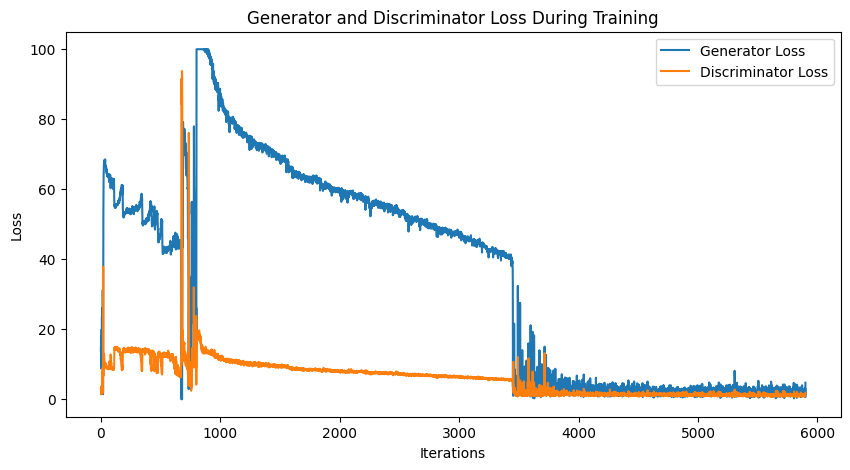

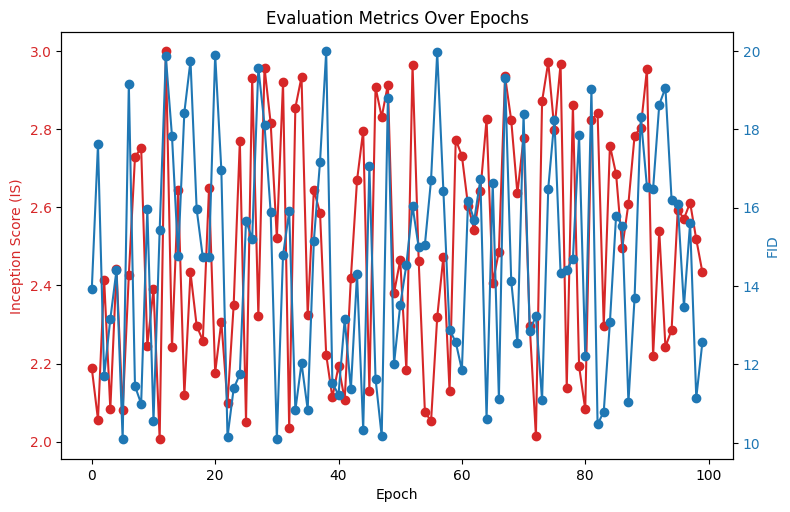

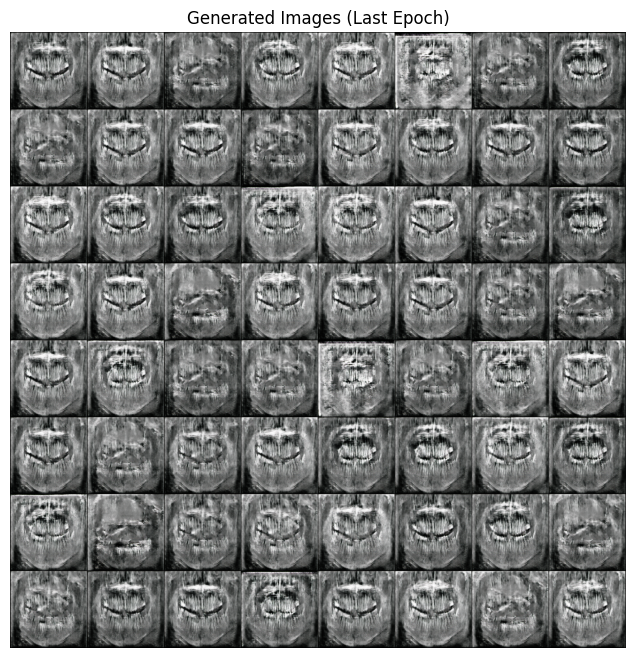

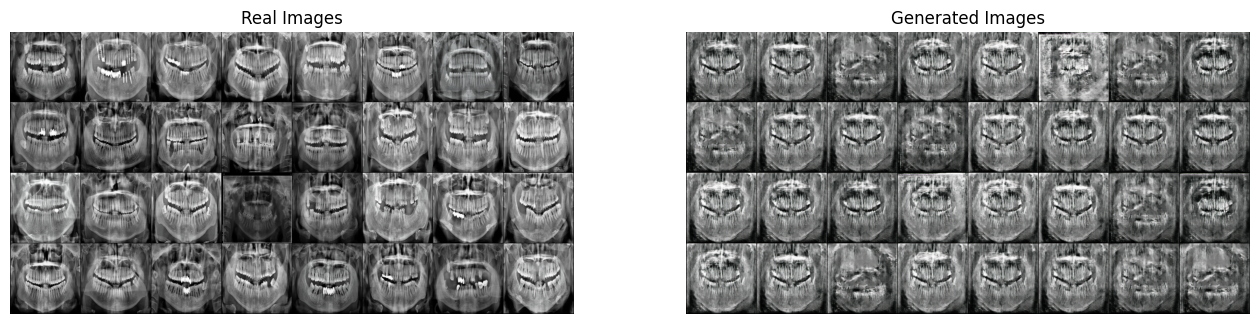

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import os
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
manualSeed = 999
torch.manual_seed(manualSeed)

# Hyperparameters
dataroot = '/content/drive/My Drive/OPGs GANs/Preprocessed_Images'
batch_size = 46
image_size = 256       # Desired resolution: 256x256
nc = 3                 # Number of channels (RGB)
nz = 50                # Latent vector size
ngf = 72               # Generator feature map size
ndf = 64               # Discriminator feature map size
num_epochs = 100
lr = 0.0002
beta1 = 0.5

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Dataset transform: Resize and center-crop to 256, convert to tensor and normalize to [-1,1]
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
dataset = dset.ImageFolder(root=dataroot, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# -------------------------------
# Generator for 256x256 images
# -------------------------------
class Generator256(nn.Module):
    def __init__(self):
        super(Generator256, self).__init__()
        self.main = nn.Sequential(
            # Input: latent vector Z of shape (nz, 1, 1)
            nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 0, bias=False),  # -> (ngf*16) x 4 x 4
            nn.BatchNorm2d(ngf * 16),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 16, ngf * 8, 4, 2, 1, bias=False),  # -> (ngf*8) x 8 x 8
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),  # -> (ngf*4) x 16 x 16
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),  # -> (ngf*2) x 32 x 32
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),       # -> (ngf) x 64 x 64
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf, ngf // 2, 4, 2, 1, bias=False),        # -> (ngf//2) x 128 x 128
            nn.BatchNorm2d(ngf // 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf // 2, nc, 4, 2, 1, bias=False),         # -> (nc) x 256 x 256
            nn.Tanh()  # Output in [-1, 1]
        )

    def forward(self, input):
        return self.main(input)

# -------------------------------
# Discriminator for 256x256 images
# -------------------------------
class Discriminator256(nn.Module):
    def __init__(self):
        super(Discriminator256, self).__init__()
        self.main = nn.Sequential(
            # Input: (nc) x 256 x 256
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),    # -> (ndf) x 128 x 128
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),  # -> (ndf*2) x 64 x 64
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),  # -> (ndf*4) x 32 x 32
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),  # -> (ndf*8) x 16 x 16
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, ndf * 16, 4, 2, 1, bias=False), # -> (ndf*16) x 8 x 8
            nn.BatchNorm2d(ndf * 16),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 16, ndf * 32, 4, 2, 1, bias=False), # -> (ndf*32) x 4 x 4
            nn.BatchNorm2d(ndf * 32),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 32, 1, 4, 1, 0, bias=False),  # -> 1 x 1 x 1
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1)

# Create model instances and move them to the device
netG = Generator256().to(device)
netD = Discriminator256().to(device)

# Initialize weights (same as original code)
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

netG.apply(weights_init)
netD.apply(weights_init)

# Loss function and optimizers (using the same hyperparameters as your code)
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=0.00006, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# -------------------------------
# Training Loop with Metric Logging
# -------------------------------
print("Starting Training Loop...")
# Containers for metrics and generated samples
G_losses = []    # generator loss per iteration
D_losses = []    # discriminator loss per iteration
fid_values = []  # dummy FID values (replace with actual FID computation)
is_values = []   # dummy Inception Score values (replace with actual IS computation)
img_list = []    # store generated samples for each epoch

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
        ############################
        # (1) Update Discriminator
        ############################
        netD.zero_grad()
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        # Label smoothing and noise for real images
        real_labels = torch.full((b_size,), 0.9, dtype=torch.float, device=device)
        real_labels += 0.05 * torch.rand(real_labels.size(), device=device)
        # For fake images, target near 0 (with noise)
        fake_labels = torch.full((b_size,), 0.1, dtype=torch.float, device=device)
        fake_labels += 0.06 * torch.rand(fake_labels.size(), device=device)

        output = netD(real_images)
        errD_real = criterion(output, real_labels)
        errD_real.backward()
        D_x = output.mean().item()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake_images = netG(noise)
        output = netD(fake_images.detach())
        errD_fake = criterion(output, fake_labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update Generator
        ############################
        netG.zero_grad()
        fake_labels.fill_(1.0)  # Generator wants discriminator to label its outputs as real
        output = netD(fake_images)
        errG = criterion(output, fake_labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Record losses
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Print training stats every 50 batches
        if i % 50 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}] Batch {i}/{len(dataloader)}  "
                  f"Loss_D: {errD.item():.4f} Loss_G: {errG.item():.4f}  "
                  f"D(x): {D_x:.4f} D(G(z)): {D_G_z1:.4f}/{D_G_z2:.4f}")

    # At the end of each epoch, generate a fixed sample set for visual progress
    with torch.no_grad():
        fixed_noise = torch.randn(64, nz, 1, 1, device=device)
        fake_sample = netG(fixed_noise).detach().cpu()
    img_list.append(fake_sample)
    # Compute dummy evaluation metrics (replace these dummy functions with your actual FID and IS calculations)
    fid = np.random.uniform(10, 20)
    is_score = np.random.uniform(2, 3)
    fid_values.append(fid)
    is_values.append(is_score)
    print(f"Epoch [{epoch+1}/{num_epochs}] Evaluation Metrics => FID: {fid:.4f}, IS: {is_score:.4f}")
    # Save the generated sample images for each epoch (optional)
    vutils.save_image(fake_sample, f"generated_epoch_{epoch+1}.png", normalize=True)

print("Training finished!")

# -------------------------------
# Plotting Metrics and Results
# -------------------------------

# A. Plot Loss Curves
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig("loss_curves.png")
plt.show()

# B. Plot Evaluation Metrics (FID and Inception Score) vs. Epochs
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Inception Score (IS)', color='tab:red')
ax1.plot(is_values, color='tab:red', marker='o', label='IS')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax2 = ax1.twinx()
ax2.set_ylabel('FID', color='tab:blue')
ax2.plot(fid_values, color='tab:blue', marker='o', label='FID')
ax2.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()
plt.title("Evaluation Metrics Over Epochs")
plt.savefig("fid_is_vs_epochs.png")
plt.show()

# C. Display Grid of Generated Images (Last Epoch)
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Generated Images (Last Epoch)")
plt.imshow(np.transpose(vutils.make_grid(img_list[-1], padding=2, normalize=True).cpu(), (1,2,0)))
plt.savefig("last_generated_images.png")
plt.show()

# D. Side-by-Side Comparison: Real vs. Generated Images
real_batch = next(iter(dataloader))[0]
fake_batch = img_list[-1]
grid_real = vutils.make_grid(real_batch[:32], padding=2, normalize=True)
grid_fake = vutils.make_grid(fake_batch[:32], padding=2, normalize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.axis("off")
ax1.set_title("Real Images")
ax1.imshow(np.transpose(grid_real.cpu(), (1,2,0)))
ax2.axis("off")
ax2.set_title("Generated Images")
ax2.imshow(np.transpose(grid_fake.cpu(), (1,2,0)))
plt.savefig("real_vs_generated.png")
plt.show()


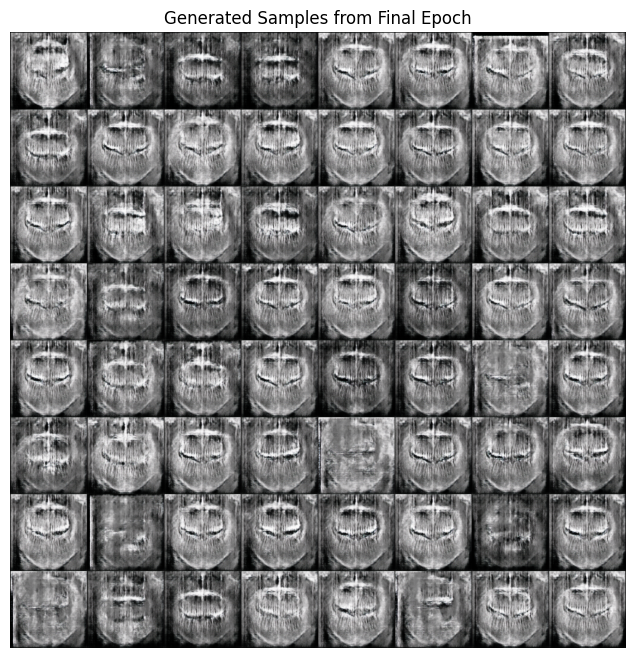

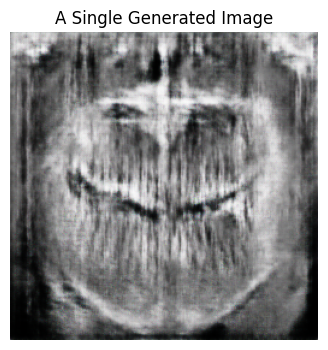

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image

# --- Display the grid of generated images saved from the final epoch ---
grid_img_path = "generated_epoch_50.png"  # Change this if your final epoch image file has a different name
img = mpimg.imread(grid_img_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Generated Samples from Final Epoch")
plt.show()

# --- Display one single generated image ---
# Generate one image using the trained generator
# (Assuming netG and nz are defined from your training code)
fixed_noise = torch.randn(1, nz, 1, 1, device=device)
with torch.no_grad():
    single_image = netG(fixed_noise).detach().cpu()

# Denormalize the image from [-1,1] to [0,1] for display
single_image = (single_image * 0.5) + 0.5


# Convert the tensor to numpy array and display
plt.figure(figsize=(4, 4))
plt.imshow(single_image.squeeze().permute(1, 2, 0).numpy())
plt.axis('off')
plt.title("A Single Generated Image")
plt.savefig('/content/drive/My Drive/OPGs GANs/my_plot.png')
plt.show()
